## Parte Clustering: Wine Clustering usando K-Means 🍷
(Sacado de Kaggle en https://www.kaggle.com/code/shawnmichael/wine-clustering-using-k-means/notebook)

Tenemos una serie de botellas de vino con ciertos atributos químicos (cantidad de alcohol, de ácido málico, alcalinidad, nivel de magnesio, etc) y queremos agruparlos en clusters.

Recordemos que existen varios tipos de vinos (como el Carmenere, Merlot, Cabernet Sauvignon, etc) dependiendo de la cepa de la uva, así que es práctico saber separarlos por características si no tenemos su etiqueta :)

In [1]:
# Importing important libraries that help our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Reading the dataset
filepath = "wine-clustering.csv"
df = pd.read_csv(filepath)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

Hacemos un poco de preprocesamiento para tener un dataset con las 2 dimensiones más importantes (spoiler de PCA)

In [4]:
pca = PCA()
df_tf = pca.fit_transform(df)
df_new = pd.DataFrame(df_tf)
df_new = pd.DataFrame(df_new.iloc[:,0:2])
df_new.columns = ["Alcohol", "Malic_Acid"]
df_new.head()

,Alcohol,Malic_Acid
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

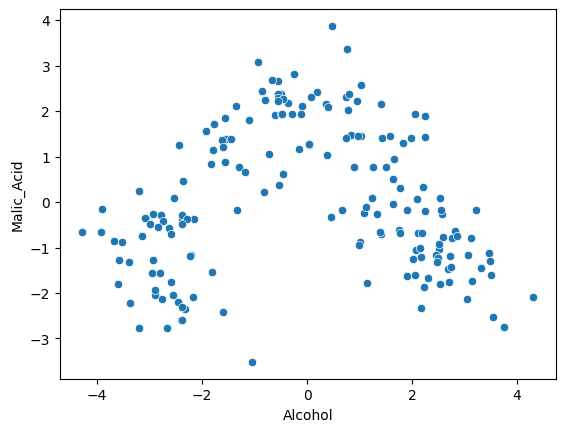

In [5]:
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"])

Usaremos K means para hacer un clustering para clasificar tipos de vinos según estas características (grado de alcohol y de ácido málico)

In [6]:
km = KMeans(
    n_clusters = 3,     # número de clusters
    init = "k-means++", # método de inicialización: en este caso, elige convenientemente donde poner los centroides inicialmente
    n_init = 10)        # cuántas veces corremos k-means con diferentes centroides
km.fit(df_new)
df_new["labels"] = km.labels_

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

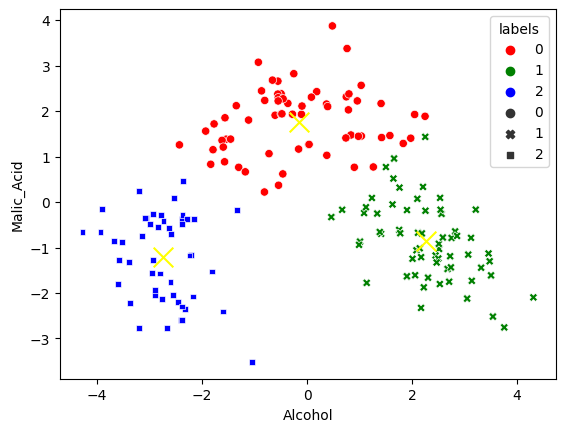

In [7]:
# Podremos separar en 3 clusters claros
sns.scatterplot(
    x = df_new["Alcohol"],
    y = df_new["Malic_Acid"],
    hue = df_new["labels"],
    style = km.labels_,
    palette = ["red", "green", "blue"])

plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker = "x",
    s = 200,
    c = "yellow")

# PCA y SFS

In [8]:
!git clone https://github.com/domingomery/balu3
!pip install ./balu3

fatal: destination path 'balu3' already exists and is not an empty directory.
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43701 sha256=8b3b1d6da434032e41dc4d8c6b8f68021fc30de9f8b7810295d17be161ef8985
  Stored in directory: /private/var/folders/y0/s_xj92w92bl3jpf7qn77mrb00000gq/T/pip-ephem-wheel-cache-6ndtegsw/wheels/52/ae/1a/4f0fad143a1e8a2aa1c5ad1d0db5c453eadfe8973322dba13a
Successfully built balu3
  Attempting uninstall: balu3
    Found existing installation: balu3 1.0
    Uninstalling balu3-1.0:
      Successfully uninstalled balu3-1.0


In [9]:
# Importamos de sklearn los algoritmos SFS y PCA

from   balu3.fs.sel    import sfs
from   balu3.ft.trans  import pca
from   balu3.ft.norm   import minmax

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

In [10]:
# Importamos un dataset para probar los algoritmos

from sklearn.datasets import fetch_covtype
data = fetch_covtype()
print(data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [11]:
# Pasamos a df de pandas

df = pd.DataFrame(data.data, columns=data.feature_names)

In [12]:
# Definimos las etiquetas del dataset
df['target'] = data.target
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [13]:
# Tomamos las primeras 1000 filas para probar los algoritmos

target = data.target[:10000]
data = data.data[:10000]

In [14]:
# Separamos train test

X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((8000, 54), (2000, 54))

In [15]:
# Clasificamos con un clasificador de KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.8115
Confusion Matrix: 
 [[183  52   1   0  11   0  33]
 [ 58 164   6   0  48   6   5]
 [  0   1 195  28   3  37   0]
 [  0   0   7 296   0   9   0]
 [  3   5   4   0 301   3   0]
 [  0   3  23  18   1 248   0]
 [ 11   1   0   0   0   0 236]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.65      0.68       280
           2       0.73      0.57      0.64       287
           3       0.83      0.74      0.78       264
           4       0.87      0.95      0.91       312
           5       0.83      0.95      0.89       316
           6       0.82      0.85      0.83       293
           7       0.86      0.95      0.90       248

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.81      0.81      0.81      2000



In [16]:
# Aplicamos SFS para seleccionar las 20 mejores características

sfs1 = sfs(X_train, y_train, n_features=40, show=True)

Selecting Features: 100%|██████████| 40.0/40.0 [00:03<00:00, 10.4 features/s]


In [17]:
sfs1

array([ 0, 13, 12, 16, 17, 19, 23, 15, 52, 51, 53, 48, 30, 27, 26, 24, 14,
       43, 18, 50,  9,  6, 25,  4,  5, 29, 45, 46, 33,  8,  3, 49, 42, 31,
       36, 22,  7, 35,  1, 47])

In [18]:
Xtrain_sfs1 = X_train[:,sfs1]
Xtest_sfs1  = X_test[:,sfs1]

In [19]:
# Clasificamos con un clasificador de KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain_sfs1, y_train)

y_pred_sfs = knn.predict(Xtest_sfs1)

print('Accuracy: ', accuracy_score(y_test, y_pred_sfs))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_sfs))
print('Classification Report: \n', classification_report(y_test, y_pred_sfs))

Accuracy:  0.811
Confusion Matrix: 
 [[183  52   1   0  11   0  33]
 [ 58 164   6   0  48   6   5]
 [  0   1 195  28   3  37   0]
 [  0   0   7 296   0   9   0]
 [  3   5   4   0 301   3   0]
 [  0   3  23  18   2 247   0]
 [ 11   1   0   0   0   0 236]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.65      0.68       280
           2       0.73      0.57      0.64       287
           3       0.83      0.74      0.78       264
           4       0.87      0.95      0.91       312
           5       0.82      0.95      0.88       316
           6       0.82      0.84      0.83       293
           7       0.86      0.95      0.90       248

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.81      0.81      0.81      2000



In [20]:
# PCA
q = 5
Xtrain_pca, _, A, Xm, _ = pca(Xtrain_sfs1, n_components=q)
Xtest_pca = np.matmul(Xtest_sfs1 - Xm, A)

In [21]:
# Clasificamos con un clasificador de KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain_pca, y_train)

y_pred_pca = knn.predict(Xtest_pca)

print('Accuracy: ', accuracy_score(y_test, y_pred_pca))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_pca))
print('Classification Report: \n', classification_report(y_test, y_pred_pca))

Accuracy:  0.8025
Confusion Matrix: 
 [[184  55   1   0  10   0  30]
 [ 61 159   7   0  49   7   4]
 [  0   3 184  36   3  38   0]
 [  0   0   7 299   0   6   0]
 [  4   4   3   0 302   3   0]
 [  0   3  27  19   3 241   0]
 [ 11   1   0   0   0   0 236]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.71      0.66      0.68       280
           2       0.71      0.55      0.62       287
           3       0.80      0.70      0.75       264
           4       0.84      0.96      0.90       312
           5       0.82      0.96      0.88       316
           6       0.82      0.82      0.82       293
           7       0.87      0.95      0.91       248

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.79      2000
weighted avg       0.80      0.80      0.80      2000

